# K-means clustering on images

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# I'll use this later to draw the memberships of the groups 
from matplotlib.colors import ListedColormap


In [10]:
im = cv2.imread(os.path.relpath('../../Data/Coins2.png'), cv2.IMREAD_COLOR)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

## Color based K-means

modified from: https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html

Input parameters
* samples : It should be of np.float32 data type, and each feature should be put in a single column.
* nclusters(K) : Number of clusters required at end
* criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. ( type, max_iter, epsilon ):
    * type of termination criteria. It has 3 flags as below:
        * cv.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached.
        * cv.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter.
        * cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
    * max_iter - An integer specifying maximum number of iterations.
    * epsilon - Required accuracy
* attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best 
compactness. This compactness is returned as output.
* flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

Output parameters
* compactness : It is the sum of squared distance from each point to their corresponding centers.
* labels : This is the label array where each element marked '0', '1'.....
* centers : This is array of centers of clusters.

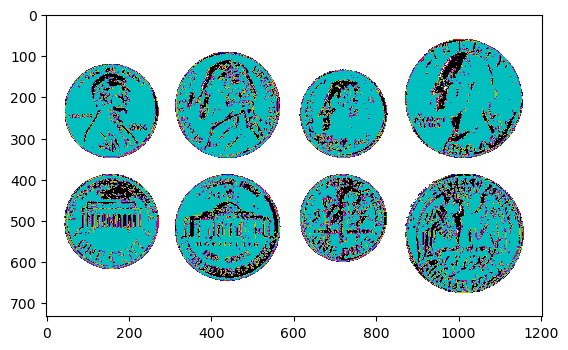

In [11]:
im_vector = im.reshape((-1,3))
im_vector = np.float32(im_vector)


# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
compactness,label,center=cv2.kmeans(im_vector,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
 
# Now convert back into uint8, and make original image
label = label.reshape((im.shape[0],im.shape[1]))

colorcube_cmap = ListedColormap(['w','b','g','r','c','m','y','k'])
plt.imshow(label,cmap=colorcube_cmap)


Now let's do it again using color and location

Text(0.5, 1.0, 'Color only (alpha=1)')

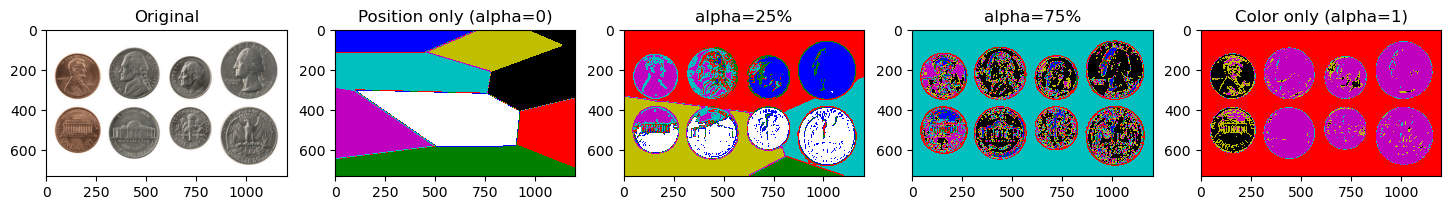

In [13]:
# Positions of pixels
x, y = np.indices((im.shape[0],im.shape[1]))
x = np.float32(x.reshape((-1,1)))
y = np.float32(y.reshape((-1,1)))

# Since we are mixing variables (color and position) with different units, we need to normalize these variables
im_vector_norm = (im_vector-im_vector.mean())/im_vector.var()
x_norm = (x-x.mean())/x.var()
y_norm = (y-y.mean())/y.var()

K = 9

# Let's use a variable to adjust the weight of how much to use the color vs position information
# alpha = 1 -- only color information
# alpha = 0 -- only position information

alpha = 0
im_color_pos = np.hstack((im_vector_norm*alpha,x_norm*(1-alpha),y_norm*(1-alpha)))
compactness,label1,center=cv2.kmeans(im_color_pos,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

alpha = .25
im_color_pos = np.hstack((im_vector_norm*alpha,x_norm*(1-alpha),y_norm*(1-alpha)))
compactness,label2,center=cv2.kmeans(im_color_pos,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

alpha = .75
im_color_pos = np.hstack((im_vector_norm*alpha,x_norm*(1-alpha),y_norm*(1-alpha)))
compactness,label3,center=cv2.kmeans(im_color_pos,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

alpha = 1
im_color_pos = np.hstack((im_vector_norm*alpha,x_norm*(1-alpha),y_norm*(1-alpha)))
compactness,label4,center=cv2.kmeans(im_color_pos,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)


# Now convert back into uint8, and make original image
label1 = label1.reshape((im.shape[0],im.shape[1]))
label2 = label2.reshape((im.shape[0],im.shape[1]))
label3 = label3.reshape((im.shape[0],im.shape[1]))
label4 = label4.reshape((im.shape[0],im.shape[1]))

colorcube_cmap = ListedColormap(['w','b','g','r','c','m','y','k'])

plt.figure(figsize=[18, 5])
plt.subplot(151); plt.imshow(im); plt.title("Original") 
plt.subplot(152); plt.imshow(label1,cmap=colorcube_cmap); plt.title("Position only (alpha=0)") 
plt.subplot(153); plt.imshow(label2,cmap=colorcube_cmap); plt.title("alpha=25%") 
plt.subplot(154); plt.imshow(label3,cmap=colorcube_cmap); plt.title("alpha=75%") 
plt.subplot(155); plt.imshow(label4,cmap=colorcube_cmap); plt.title("Color only (alpha=1)") 
